In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# SymPy Tutorial

This notebook is intended to introduce a very useful feature of SciPy known as "Symbolic Python" or SymPy for short.

With `sympy` you can compute algebraic simplifications, much in the same way as Mathematica or Wolfram Alpha. These symbolic manipulations can often be paired with conversion to `numpy` arrays, so are a useful took in the general python kit.

First we enable "pretty-printing" for symbolic expressions, so they render nicely in the notebook.

In [2]:
sp.init_printing()  # Tell sympy to use the prettiest printing available (in Jupyter, this means $\LaTeX$)

## Defining variables

In normal python, variables are just defined and hold whatever type you put in them. However, if you wish to perform symbolic algebra, you need to tell python than specific variable names are being reserved as algebraic symbols.

In [3]:
x,y,z,t,w,k = sp.symbols('x y z t w k')         # Define common variable names to be mathematical variable symbols
f,g = sp.symbols('f g', cls=sp.Function)  # define variables f and g to be mathematical function symbols

Once the symbols are defined, you can then use them to perform algebraic simplifications and other calculations. Below I show a variety of useful things you can do to make your life easier (say, in your other physics assignments).

## Algebraic Examples:

Expand $(x+y)^3$:

In [4]:
sp.expand((x+y)**3)

Factor $x^2 + 2xy + y^2$:

In [5]:
sp.factor(x**2 + 2*x*y + y**2)

Solve algebraic equation: $x^3 = 1$

In [6]:
sp.solve( sp.Eq(x**3,1) )  
# Note that sp.Eq is a class that instantiates an equation from a symbolic expression and what the expression must equal
# Note also that it understands complex numbers properly

## Calculus examples:

Differentiate: $\frac{d}{dy}(x+y)^3$

In [7]:
sp.diff((x+y)**3, y)

# Multiply differentiate: $\frac{d^3}{dy^2dx}(x+y)^3$

In [8]:
sp.diff((x+y)**3, y, 2, x)

Integrate: $\int_{-\infty}^\infty e^{-x^2}dx$

In [9]:
sp.integrate(sp.exp(-x**2),(x,-sp.oo,sp.oo))  # Note that sp.oo is infinity, and sp.exp is the symbolic exponentiation function

## Differential Equation examples:

Solve (damped Harmonic Oscillator) differential equation: $f''(t) + k f'(t) + w^2 f(t) = 0$

In [10]:
diffeq = sp.Eq(f(t).diff(t,t) + k * f(t).diff(t) +  w**2 * f(t), 0)
diffeq

In [11]:
sp.dsolve(diffeq, f(t))

Note that the solution has two arbitrary constants $C_1$ and $C_2$, in accordance with the number of initial conditions needed to specify the solution.

## Switching from SymPy to NumPy

Occasionally it is useful to do some algebraic computations and then convert the results into numerical approximations that you can use with `numpy`.

In the following example, we define a Gaussian function, take its derivative and integral symbolically, then convert the results to numerical versions and plot them.

### Symbolic definition

First, define a Gaussian function symbolically:

In [12]:
gaussexp = sp.exp(-x**2/2)/sp.sqrt(2*sp.pi)  # Note all functions and constants are inside sympy here

$g(x) = $

In [13]:
gaussexp

### Symbolic manipulation

First we define the derivative of the Gaussian:

$\frac{d}{dx}g(x) = $

In [14]:
gaussdiffexp = gaussexp.diff(x)


In [15]:
gaussdiffexp

Then we define the cumulative integral of the Gaussian:

$\int_{-\infty}^x g(x')dx' = $

In [16]:
gaussintexp = sp.integrate(gaussexp, (x, -sp.oo, x))

In [17]:
gaussintexp

Note that `sympy` is already familiar with the Error Function `erf` that results from integrating a Gaussian.

### Replacing algebra with numerics

If you wish to evaluate a symbolic function, you can use the `replace` method of an expression to do a substitution of a variable with a specific value.

In [18]:
gaussexp.replace(x, 1)

The `evalf` method can then compute a numerical (float) value from an expression that does not contain any more variables. You can specify any desired precision for the computation.

In [19]:
gaussexp.replace(x, 1).evalf(100)

In [20]:
sp.pi

In [21]:
sp.pi.evalf(100)

In [22]:
gaussdiffexp.replace(x, 1)

In [23]:
gaussdiffexp.replace(x, 1).evalf(100)

To convert a symbolic expression to a numerical function, you can use the `lambdify` function. This replaces the indicated symbolic variable with an array variable, and replaces all `sympy` functions that are also in `numpy` with their `numpy` equivalents. If the function is not in `numpy`, then `sympy` will search for suitable numerical evaluation function inside its own libraries, or within `scipy`.

In [24]:
gaussexp

In [25]:
gauss = sp.lambdify(x, gaussexp)
# This works because numpy contains pi and exp already

In [26]:
gauss(1)  # Compare with the replace statement above

In [27]:
gaussdiffexp

In [28]:
dgaussdx = sp.lambdify(x, gaussdiffexp)
# This works because numpy contains pi and exp

In [29]:
dgaussdx(1)  # Compare with the replace statement above

The following expression contains `erf`, which is a symbolic function not in `numpy`:

In [30]:
gaussintexp

In [31]:
np.erf

AttributeError: module 'numpy' has no attribute 'erf'

Nevertheless, the `lambdify` works since it finds an implementation in `scipy.special.erf`.

In [32]:
intgauss = sp.lambdify(x, gaussintexp)

In [33]:
intgauss(1)

In [34]:
gaussintexp.replace(x, 1).evalf(100)

## Plotting examples:

Here we use the `numpy` functions derived above from the `sympy` algebraic manipulations to plot the functions in a nice way.

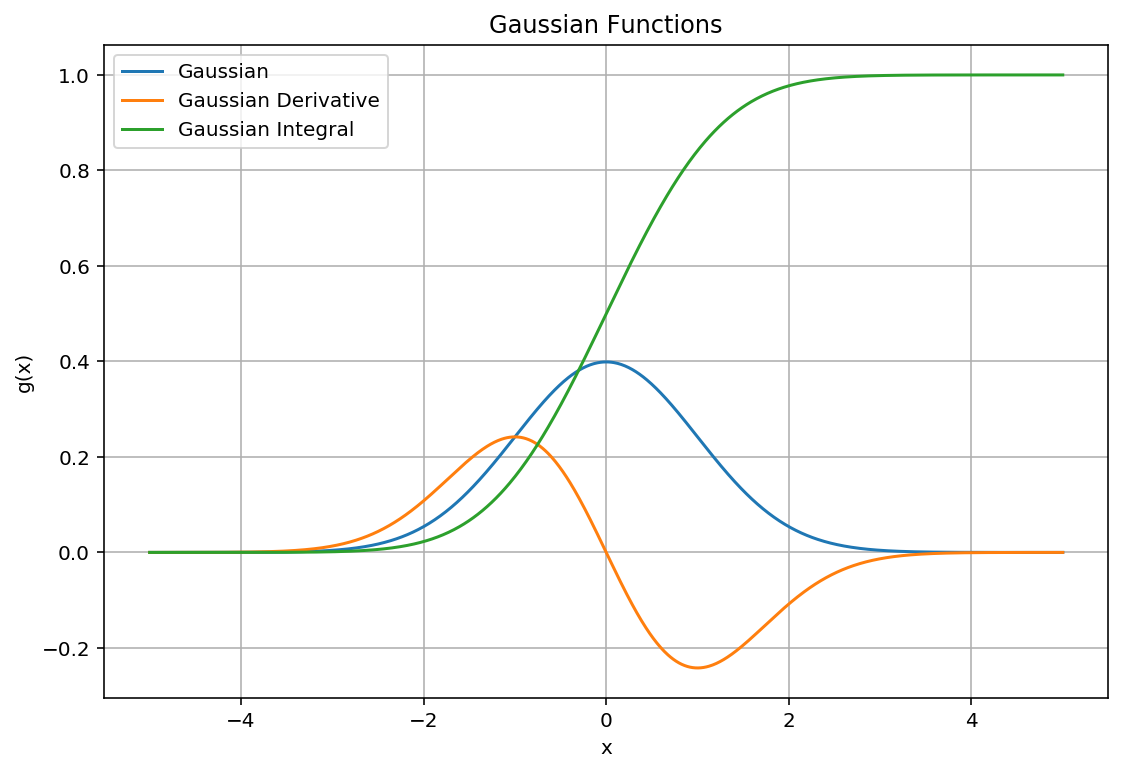

In [35]:
xnp = np.linspace(-5,5,1000)

plt.figure(1, figsize=(9,6))
plt.plot(xnp, gauss(xnp), label="Gaussian")
plt.plot(xnp, dgaussdx(xnp), label="Gaussian Derivative")
plt.plot(xnp, intgauss(xnp), label="Gaussian Integral")
plt.title("Gaussian Functions")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.show()